In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import pylab 
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
data=pd.read_csv("titanic.csv")

In [3]:
data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [5]:
data.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [6]:
data.shape

(850, 15)

In [7]:
## Displaying the total number of missing values in the dataset

data.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [8]:
median=data.age.median()
median

28.0

In [9]:
data.age=data.age.fillna(data.age.median())

In [10]:
data.age.isnull().sum()

0

In [11]:
data.embarked.mode()[0]

'S'

In [12]:
data.embarked=data.embarked.fillna(data.embarked.mode()[0])

In [13]:
data.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          0
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [14]:
data.fare=data.fare.fillna(data.fare.median())

In [15]:
data.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
cabin           659
embarked          0
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [16]:
df=pd.read_csv('titanic.csv',usecols=['age','fare','survived'])

In [17]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [18]:
df.isnull().sum()

age         174
fare          1
survived      0
dtype: int64

In [19]:
## Random  Sample imputation

df.age.dropna().sample(df.age.isnull().sum(),random_state=42)

810    32.0
378    22.0
467    31.0
628    22.0
738    25.0
       ... 
772    27.0
221    17.0
311    18.0
312    40.0
8      22.0
Name: age, Length: 174, dtype: float64

In [20]:
df[df.age.isnull()].index

Int64Index([  0,  17,  21,  28,  30,  31,  33,  38,  41,  46,
            ...
            763, 778, 780, 787, 794, 814, 820, 821, 828, 836],
           dtype='int64', length=174)

In [34]:
def impute_nan(df,var,mean,median):
    df[var+"_median"]=df[var].fillna(median)
    df[var+"_mean"]=df[var].fillna(mean)
    df[var+"_random"]=df[var]
    
    
    ##it will have the random values to fill the nan 
    random_sample=df[var].dropna().sample(df.age.isnull().sum(),random_state=42)
    random_sample.index=df[df[var].isnull()].index
    df.loc[df[var].isnull(),var+"_random"]=random_sample

In [35]:
mean=df.age.mean()

In [36]:
median=df.age.median()

In [37]:
impute_nan(df,'age',mean,median)

In [38]:
df.head()

,age,fare,survived,age_median,age_mean,age_random
0,NaN,7.7333,1,28.0,29.519847,32.0
1,38.0,8.6625,0,38.0,38.000000,38.0
2,30.0,24.1500,0,30.0,30.000000,30.0
3,54.0,23.0000,1,54.0,54.000000,54.0
4,40.0,13.0000,0,40.0,40.000000,40.0


In [39]:
df.isnull().sum()

age           174
fare            1
survived        0
age_median      0
age_mean        0
age_random      0
dtype: int64

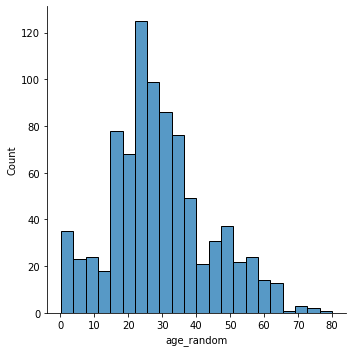

In [40]:
sns.displot(df.age_random)

<AxesSubplot:xlabel='age', ylabel='Density'>

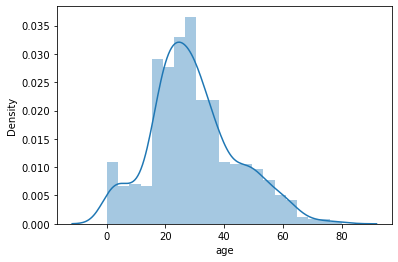

In [41]:
sns.distplot(df.age)

<AxesSubplot:xlabel='age_mean', ylabel='Density'>

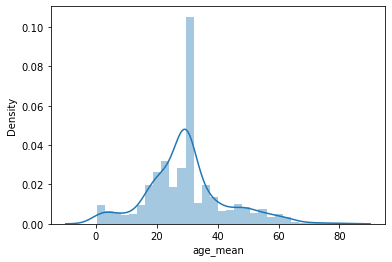

In [42]:
sns.distplot(df.age_mean)

<AxesSubplot:xlabel='age_median', ylabel='Density'>

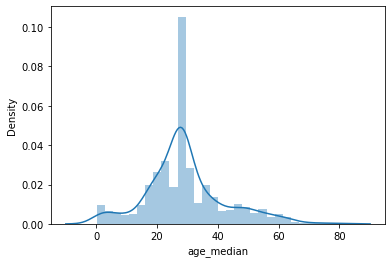

In [44]:
sns.distplot(df.age_median)

In [45]:
## Handling categorical variable
df1=pd.read_csv('titanic.csv',usecols=['sex'])

In [46]:
df1.head()

,sex
0,female
1,male
2,female
3,female
4,male


In [47]:
## One-hot encoding

pd.get_dummies(df1).head()

,sex_female,sex_male
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [48]:
df=pd.read_csv('titanic.csv')

In [49]:
## Label encoding

from sklearn.preprocessing import LabelEncoder

In [50]:
encode=LabelEncoder()

In [51]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [52]:
df.drop(columns=['passenger_id','name','sibsp','ticket','fare'],inplace=True)

In [53]:
df.embarked.mode()[0]

'S'

In [55]:
df.embarked=df.embarked.fillna(df.embarked.mode()[0])

In [56]:
df.embarked.isnull().sum()

0

In [57]:
df.embarked=encode.fit_transform(df.embarked)

In [58]:
df.embarked

0      1
1      2
2      2
3      2
4      2
      ..
845    2
846    0
847    2
848    2
849    2
Name: embarked, Length: 850, dtype: int32

In [59]:
df.head()

,pclass,sex,age,parch,cabin,embarked,boat,body,home.dest,survived
0,3,female,NaN,0,NaN,1,13,NaN,NaN,1
1,3,male,38.0,0,NaN,2,NaN,NaN,Croatia,0
2,3,female,30.0,1,NaN,2,NaN,NaN,NaN,0
3,2,female,54.0,3,NaN,2,4,NaN,"Cornwall / Akron, OH",1
4,2,male,40.0,0,NaN,2,NaN,NaN,"Barre, Co Washington, VT",0


In [60]:
df.sex=encode.fit_transform(df.sex)
df.sex

0      0
1      1
2      0
3      0
4      1
      ..
845    1
846    1
847    0
848    0
849    1
Name: sex, Length: 850, dtype: int32

In [61]:
df.cabin=np.where(df.cabin.isnull(),0,1)

In [62]:
df.head()

,pclass,sex,age,parch,cabin,embarked,boat,body,home.dest,survived
0,3,0,NaN,0,0,1,13,NaN,NaN,1
1,3,1,38.0,0,0,2,NaN,NaN,Croatia,0
2,3,0,30.0,1,0,2,NaN,NaN,NaN,0
3,2,0,54.0,3,0,2,4,NaN,"Cornwall / Akron, OH",1
4,2,1,40.0,0,0,2,NaN,NaN,"Barre, Co Washington, VT",0


## Feature scaling/Transformation

In [64]:
df=pd.read_csv('titanic.csv',usecols=['pclass','age','fare','survived'])

In [65]:
df.head()

,pclass,age,fare,survived
0,3,NaN,7.7333,1
1,3,38.0,8.6625,0
2,3,30.0,24.1500,0
3,2,54.0,23.0000,1
4,2,40.0,13.0000,0


In [66]:
df.isnull().sum()

pclass        0
age         174
fare          1
survived      0
dtype: int64

In [67]:
df.age.fillna(df.age.median(),inplace=True)

In [68]:
df.fare.fillna(df.fare.mean(),inplace=True)

In [69]:
df.isnull().sum()

pclass      0
age         0
fare        0
survived    0
dtype: int64

In [70]:
## Standardization

from sklearn.preprocessing import StandardScaler



In [71]:
scaler=StandardScaler()

In [72]:
df_scaled=scaler.fit_transform(df)

In [73]:
df_scaled

array([[ 0.8114201 , -0.09304062, -0.48989835,  1.30983012],
       [ 0.8114201 ,  0.67670089, -0.47257628, -0.76345778],
       [ 0.8114201 ,  0.06090768, -0.18385963, -0.76345778],
       ...,
       [-0.38184475, -0.40093723, -0.14937209,  1.30983012],
       [ 0.8114201 , -2.01739441, -0.37726949, -0.76345778],
       [-0.38184475,  1.75433901, -0.39171698, -0.76345778]])

In [74]:
## Normalization 

from sklearn.preprocessing import MinMaxScaler 

In [76]:
norm=MinMaxScaler()

In [77]:
df_norm=norm.fit_transform(df)

In [79]:
df_norm

array([[1.        , 0.34864273, 0.0150944 , 1.        ],
       [1.        , 0.47390375, 0.01690807, 0.        ],
       [1.        , 0.37369494, 0.04713766, 0.        ],
       ...,
       [0.5       , 0.29853833, 0.05074862, 1.        ],
       [1.        , 0.0354902 , 0.02688701, 0.        ],
       [0.5       , 0.64926916, 0.02537431, 0.        ]])

## Robust Scaling


Robust Scaler algorithms scale features that are robust to outliers. The method it follows is almost similar to the MinMax Scaler but it uses the interquartile range (rather than the min-max used in MinMax Scaler). The median and scales of the data are removed by this scaling algorithm according to the quantile range.

It, thus, follows the following formula:

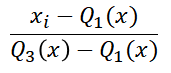



Where Q1 is the 1st quartile, and Q3 is the third quartile.

In [80]:
from sklearn.preprocessing import RobustScaler

In [81]:
robust=RobustScaler()

In [82]:
df_R=robust.fit_transform(df)

In [83]:
df_R

array([[ 0.        ,  0.        , -0.27592386,  1.        ],
       [ 0.        ,  0.77669903, -0.23570606,  0.        ],
       [ 0.        ,  0.15533981,  0.4346266 ,  0.        ],
       ...,
       [-1.        , -0.31067961,  0.51469863,  1.        ],
       [ 0.        , -1.94174757, -0.01442595,  0.        ],
       [-1.        ,  1.86407767, -0.04796963,  0.        ]])

## Gaussian Transformation



In [84]:
import scipy.stats as stat
import pylab

##Q_Q Plot

In [85]:
def plot_data (df,feature):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)

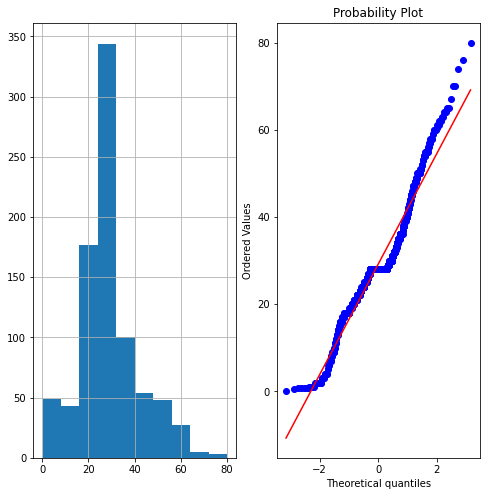

In [86]:
plot_data(df,'age')

In [87]:
## Log transformation

df['age']


0      28.0
1      38.0
2      30.0
3      54.0
4      40.0
       ... 
845    55.0
846    58.0
847    24.0
848     3.0
849    52.0
Name: age, Length: 850, dtype: float64

In [88]:
df['age_log']=np.log(df.age)

In [89]:
df.head()

,pclass,age,fare,survived,age_log
0,3,28.0,7.7333,1,3.332205
1,3,38.0,8.6625,0,3.637586
2,3,30.0,24.1500,0,3.401197
3,2,54.0,23.0000,1,3.988984
4,2,40.0,13.0000,0,3.688879


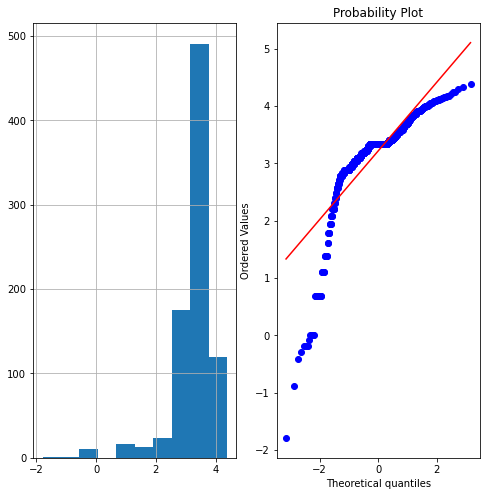

In [90]:
plot_data(df,'age_log')

In [91]:
## Reciprocal transformation
df['age_rec']=1/df.age

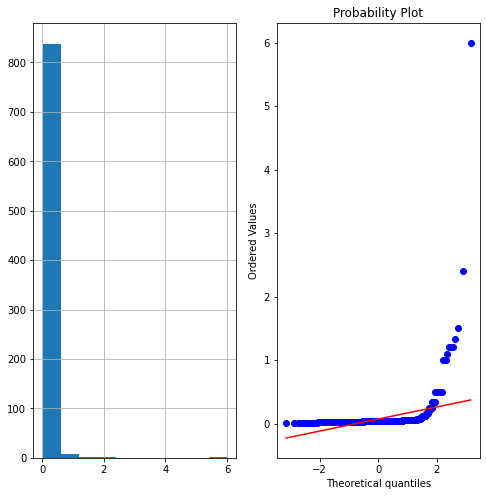

In [92]:
plot_data(df,'age_rec')

In [93]:
df.head()

,pclass,age,fare,survived,age_log,age_rec
0,3,28.0,7.7333,1,3.332205,0.035714
1,3,38.0,8.6625,0,3.637586,0.026316
2,3,30.0,24.1500,0,3.401197,0.033333
3,2,54.0,23.0000,1,3.988984,0.018519
4,2,40.0,13.0000,0,3.688879,0.025000


In [94]:
## Squre Root transformation

df['age_sqrt']=np.sqrt(df.age)

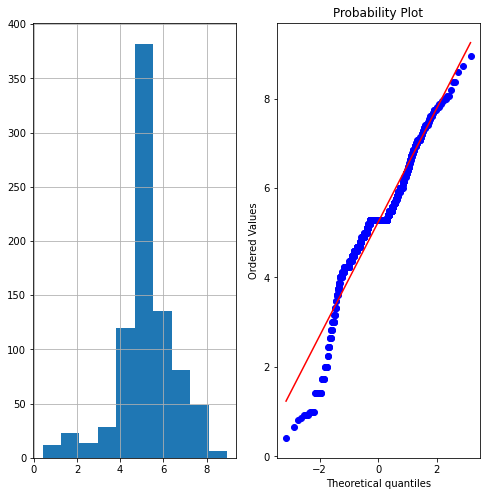

In [95]:
plot_data(df,'age_sqrt')

In [96]:
## Exponential transformation

df['age_exp']=np.exp(df.age)

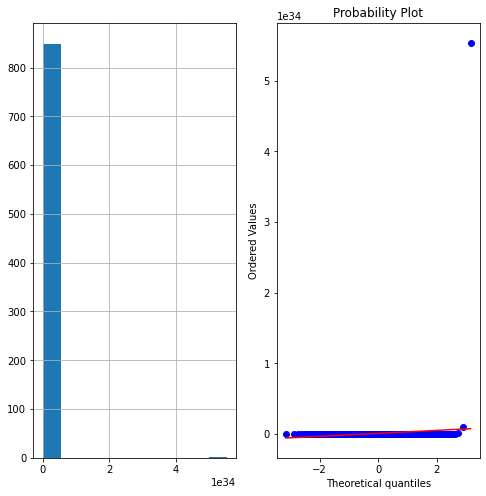

In [97]:
plot_data(df,'age_exp')

## Box-Cox transformation
If w is our transformed variable and y is our target variable, then


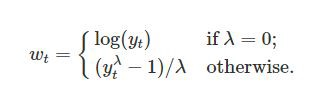
where t is the time period and lambda is the parameter that we choose (you can perform the Box-Cox transformation on non-time series data, also).
Notice what happens when lambda equals 1. In that case, our data shifts down but the shape of the data does not change. Therefore, if the optimal value for lambda is 1, then the data is already normally distributed, and the Box-Cox transformation is unnecessary.

In [98]:
df['age_box'],parameters=stat.boxcox(df.age)

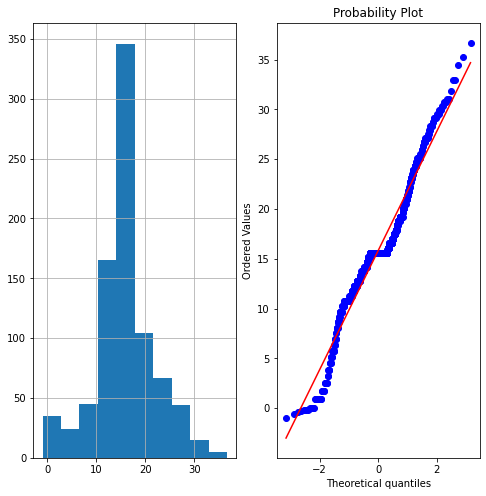

In [99]:
plot_data(df,'age_box')

<AxesSubplot:xlabel='age_box', ylabel='Density'>

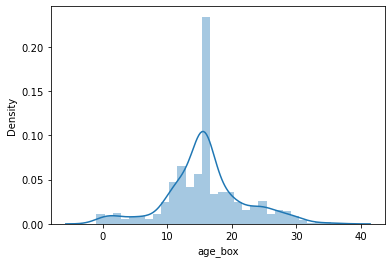

In [101]:
sns.distplot(df.age_box)

<AxesSubplot:xlabel='age_box', ylabel='Density'>

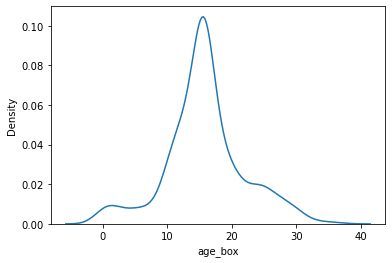

In [102]:
sns.kdeplot(df.age_box)

In [103]:
df.head()

,pclass,age,fare,survived,age_log,age_rec,age_sqrt,age_exp,age_box
0,3,28.0,7.7333,1,3.332205,0.035714,5.291503,1.446257e+12,15.621574
1,3,38.0,8.6625,0,3.637586,0.026316,6.164414,3.185593e+16,20.110838
2,3,30.0,24.1500,0,3.401197,0.033333,5.477226,1.068647e+13,16.545482
3,2,54.0,23.0000,1,3.988984,0.018519,7.348469,2.830753e+23,26.769114
4,2,40.0,13.0000,0,3.688879,0.025000,6.324555,2.353853e+17,20.974026


## Outlier Detection

In [104]:
df=pd.read_csv('titanic.csv',usecols=['survived','age','pclass'])

In [108]:
df.head()

,pclass,age,survived
0,3,NaN,1
1,3,38.0,0
2,3,30.0,0
3,2,54.0,1
4,2,40.0,0


<AxesSubplot:xlabel='age'>

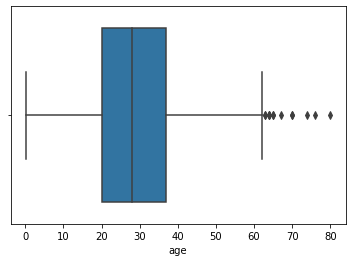

In [109]:
sns.boxplot(df.age)

<AxesSubplot:xlabel='age'>

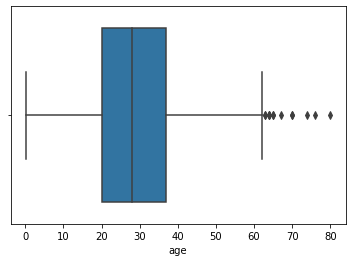

In [110]:
sns.boxplot(df.age,orient='v')

In [111]:
Q1=df.age.quantile(0.25)
Q3=df.age.quantile(0.75)
Q1,Q3

(20.0, 37.0)

In [112]:
IQR=Q3-Q1
IQR

17.0

In [113]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-5.5, 62.5)

In [114]:
df[(df.age<lower_limit)|(df.age>upper_limit)]

,pclass,age,survived
153,3,65.0,0
160,1,64.0,1
177,1,80.0,1
247,1,64.0,0
276,2,70.0,0
464,1,67.0,0
518,2,63.0,0
529,1,70.0,0
553,1,65.0,0
623,1,63.0,0


In [115]:
new_df=df[(df.age>lower_limit)&(df.age<upper_limit)]

In [116]:
new_df

,pclass,age,survived
1,3,38.0,0
2,3,30.0,0
3,2,54.0,1
4,2,40.0,0
5,3,28.0,0
...,...,...,...
845,1,55.0,0
846,1,58.0,0
847,2,24.0,1
848,3,3.0,0


<AxesSubplot:xlabel='age'>

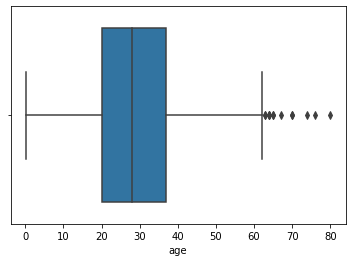

In [117]:
sns.boxplot(df.age)

<AxesSubplot:xlabel='age'>

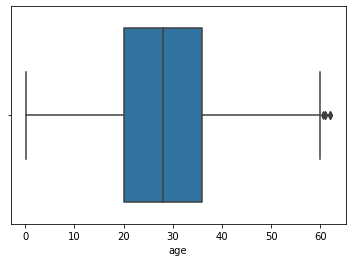

In [118]:
sns.boxplot(new_df.age)